# 1 Author

**Student Name**:  Aris Christofides

**Student ID**:  210911099



# 2 Problem formulation

For the basic solution my task is to build a machine learning pipeline that takes a Potter or StarWars audiofile as an input and outputs the correct label.

# 3 Machine Learning pipeline

My ML pipeline starts off with importing all the necessary libraries and my personal google drive. The I perform feature extraction and convert the data into a pandas dataframe. Then I do feature extraction to get the pitch and add it to a function so that Im able to distinguish if the song is "StarWars" or "Potter". Then I apply that function to obtain numpy arrays for predictors "X" and labels "y". After that, I split the training and validation data into 80%/20%. After splitting I implemented 2 different models. Support Vector Machines and Random Forest Classifier. After SVM, I normalised the predictors to see if I get better results. I finished of with testing 2 different audio recordings, using Random Forest Classifier for a "Potter" sample and SVM for a "StarWars" sample.

# 4 Transformation stage
I had to do feature extraction and clean up the data in order to have only 2 labels. The data was full of incorrectly named files that would confuse our models. If there are "Starwars", "Star Wars", "potter", "Harry Potter" and so on, that means that our models have to classify multiple classes, therefore accuracy would probably be bad. In addition, a song only has one name. So I removed all the wrong labeled songs using for loops to catch special characters and anything else different than the correct name of the song. After that I defined a function to extract the pitch from the audio files.

# 5 Modeling
I used Support Vector Machines since our problem only has 2 outcomes, and experimented with the Random Forest Classifier.

# 6 Methodology

Models will be trained using 80% of the data and validated on the remaining 20%
The model performance is assessed on both training and validation accuracy.

# 7 Dataset

Importing Python libraries and mounting personal Google Drive storage system

In [ ]:
from google.colab import drive

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import os, sys, re, pickle, glob
import urllib.request
import zipfile

import IPython.display as ipd
from tqdm import tqdm
import librosa

drive.mount('/content/drive')

Mounted at /content/drive


Extracting sample data from drive and checking how many audio files we have.

In [ ]:
directory_to_extract_to = '/content/drive/MyDrive/Data/MLEndHW/sample/'
zip_path = '/content/drive/MyDrive/Data/MLEndHW/MLEndHW_Sample.zip'
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(directory_to_extract_to)

sample_path = '/content/drive/MyDrive/Data/MLEndHW/sample/*.wav'
files = glob.glob(sample_path)
len(files)

824

In [ ]:
for file in files:
  print(file.split('/')[-1])

S1_hum_2_Potter.wav
S1_hum_2_StarWars.wav
S1_whistle_2_Potter.wav
S1_whistle_2_StarWars.wav
S10_hum_1_Potter .wav
S10_hum_2_Potter .wav
S10_hum_3_StarWars.wav
S10_hum_4_StarWars.wav
S100_hum_1_Potter.wav
S100_hum_2_Potter.wav
S100_hum_3_StarWars.wav
S100_hum_4_StarWars.wav
S101_hum_1_Potter.wav
S101_hum_2_Potter.wav
S101_hum_3_StarWars.wav
S101_hum_4_StarWars.wav
S102_hum_2_Potter.wav
S102_whistle_1_Star wars.wav
S102_whistle_2_Potter.wav
S102_whistle_2_Star wars.wav
S103_hum_2_Potter.wav
S103_hum_2_StarWars.wav
S103_whistle_2_Potter.wav
S103_whistle_2_StarWars.wav
S104_Hum_1_Potter.wav
S104_Hum_2_Potter.wav
S104_Hum_3_StarWars.wav
S104_Hum_4_StarWars.wav
S105_hum_1_harry potter.wav
S105_whistle_2_starwars.wav
S107_hum_2_Potter.wav
S107_hum_2_Starwars.wav
S107_whistle_2_Potter.wav
S107_whistle_2_Starwars.wav
S108_hum_2_Potter.wav
S108_hum_2_StarWars.wav
S108_whistle_2_Potter.wav
S108_whistle_2_StarWars.wav
S109_hum_1_[Potter].wav
S109_hum_3_[StarWars].wav
S109_hum_4_[StarWars].wav
S109

We can see that the data has too many wrong labels for song, e.g. "[Potter]", "(starwars)". So we have to do feature extraction so that our model does not get confused and eventually try to only have 2 labels. "Potter" and "StarWars".

Feature Extraction

In [ ]:
print('The full path to the first audio file is: ', files[0])
print('\n')
print('The name of the first audio file is: ', files[0].split('/')[-1])
print('    The participand ID is: ', files[0].split('/')[-1].split('_')[0])
print('    The type of interpretation is: ', files[0].split('/')[-1].split('_')[1])
print('    The interpretation number is: ', files[0].split('/')[-1].split('_')[2])
print('    The song is: ', files[0].split('/')[-1].split('_')[3])

The full path to the first audio file is:  /content/drive/MyDrive/Data/MLEndHW/sample/S1_hum_2_Potter.wav


The name of the first audio file is:  S1_hum_2_Potter.wav
    The participand ID is:  S1
    The type of interpretation is:  hum
    The interpretation number is:  2
    The song is:  Potter.wav


Creating a list and removing wrong labeled files

In [ ]:
MLENDHW_table = [] 

for file in files:
  if '[' in file or ']' in file or '(' in file or ')' in file:
    os.remove(file)
    print("Removed file:", file)
  else:
    try:
      file_name = file.split('/')[-1]
      participant_ID = file.split('/')[-1].split('_')[0]
      interpretation_type = file.split('/')[-1].split('_')[1]
      interpretation_number = file.split('/')[-1].split('_')[2]
      song = file.split('/')[-1].split('_')[3].split('.')[0]
      if song == "Potter" or song == "StarWars":
        MLENDHW_table.append([file_name,participant_ID,interpretation_type,interpretation_number, song])
      else:
        os.remove(file)
        print("Removed file:", file)
    except:
      os.remove(file)
      print("Removed file:", file)

Removed file: /content/drive/MyDrive/Data/MLEndHW/sample/S10_hum_1_Potter .wav
Removed file: /content/drive/MyDrive/Data/MLEndHW/sample/S10_hum_2_Potter .wav
Removed file: /content/drive/MyDrive/Data/MLEndHW/sample/S102_whistle_1_Star wars.wav
Removed file: /content/drive/MyDrive/Data/MLEndHW/sample/S102_whistle_2_Star wars.wav
Removed file: /content/drive/MyDrive/Data/MLEndHW/sample/S105_hum_1_harry potter.wav
Removed file: /content/drive/MyDrive/Data/MLEndHW/sample/S105_whistle_2_starwars.wav
Removed file: /content/drive/MyDrive/Data/MLEndHW/sample/S107_hum_2_Starwars.wav
Removed file: /content/drive/MyDrive/Data/MLEndHW/sample/S107_whistle_2_Starwars.wav
Removed file: /content/drive/MyDrive/Data/MLEndHW/sample/S109_hum_1_[Potter].wav
Removed file: /content/drive/MyDrive/Data/MLEndHW/sample/S109_hum_3_[StarWars].wav
Removed file: /content/drive/MyDrive/Data/MLEndHW/sample/S109_hum_4_[StarWars].wav
Removed file: /content/drive/MyDrive/Data/MLEndHW/sample/S109_whistle_1_[Potter].wav
Re

Update data

In [ ]:
sample_path = '/content/drive/MyDrive/Data/MLEndHW/sample/*.wav'
files = glob.glob(sample_path)
len(files)

667

Loading list into pandas dataframe

In [ ]:
MLENDHW_df = pd.DataFrame(MLENDHW_table,columns=['file_id','participant','interpretation','number','song']).set_index('file_id') 
MLENDHW_df

participant interpretation number      song
file_id                                                               
S1_hum_2_Potter.wav                 S1            hum      2    Potter
S1_hum_2_StarWars.wav               S1            hum      2  StarWars
S1_whistle_2_Potter.wav             S1        whistle      2    Potter
S1_whistle_2_StarWars.wav           S1        whistle      2  StarWars
S10_hum_3_StarWars.wav             S10            hum      3  StarWars
...                                ...            ...    ...       ...
S94_whistle_2_StarWars.wav         S94        whistle      2  StarWars
S97_hum_1_Potter.wav               S97            hum      1    Potter
S97_hum_2_Potter.wav               S97            hum      2    Potter
S97_hum_3_StarWars.wav             S97            hum      3  StarWars
S97_hum_4_StarWars.wav             S97            hum      4  StarWars

[667 rows x 4 columns]

Feature extraction : Pitch

The next cell defines a function that gets the pitch of an audio signal.

In [ ]:
def getPitch(x,fs,winLen=0.02):
  #winLen = 0.02 
  p = winLen*fs
  frame_length = int(2**int(p-1).bit_length())
  hop_length = frame_length//2
  f0, voiced_flag, voiced_probs = librosa.pyin(y=x, fmin=80, fmax=450, sr=fs,
                                                 frame_length=frame_length,hop_length=hop_length)
  return f0,voiced_flag

This cell defines a function that takes a number of files and creates a NumPy array containing the 4 audio features used as predictors (`X`) and a binary label (`y`), that indicates what is the name of the song.

In [ ]:
def getXy(files,labels_file, scale_audio=False, onlySingleDigit=False):
  X,y =[],[]
  for file in tqdm(files):
    fileID = file.split('/')[-1]
    file_name = file.split('/')[-1]
    yi = labels_file.loc[fileID]['song']

    fs = None # if None, fs would be 22050
    x, fs = librosa.load(file,sr=fs)
    if scale_audio: x = x/np.max(np.abs(x))
    f0, voiced_flag = getPitch(x,fs,winLen=0.02)
      
    power = np.sum(x**2)/len(x)
    pitch_mean = np.nanmean(f0) if np.mean(np.isnan(f0))<1 else 0
    pitch_std  = np.nanstd(f0) if np.mean(np.isnan(f0))<1 else 0
    voiced_fr = np.mean(voiced_flag)

    xi = [power,pitch_mean,pitch_std,voiced_fr]
    X.append(xi)
    y.append(yi)

  return np.array(X),np.array(y)

Let's apply `getXy` to the subsample and obtain the NumPy predictor array (`X`) and a binary label (`y`).

In [ ]:
X,y = getXy(files, labels_file=MLENDHW_df, scale_audio=True, onlySingleDigit=True)

100%|██████████| 667/667 [33:03<00:00,  2.97s/it]


Let's now fit an SVM model and print both the training accuracy and validation accuracy.


In [ ]:
from sklearn import svm
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, random_state=42, test_size=0.2)

model  = svm.SVC(C=1)
model.fit(X_train,y_train)

yt_p = model.predict(X_train)
yv_p = model.predict(X_val)

print('Training Accuracy', np.mean(yt_p==y_train))
print('Validation  Accuracy', np.mean(yv_p==y_val))

Training Accuracy 0.551594746716698
Validation  Accuracy 0.5671641791044776


Normalising the predictors, to see if the performance improves.

In [ ]:
mean = X_train.mean(0)
sd =  X_train.std(0)

X_train = (X_train-mean)/sd
X_val  = (X_val-mean)/sd

model  = svm.SVC(C=1,gamma=2)
model.fit(X_train,y_train)

yt_p = model.predict(X_train)
yv_p = model.predict(X_val)

print('Training Accuracy', np.mean(yt_p==y_train))
print('Validation  Accuracy', np.mean(yv_p==y_val))

Training Accuracy 0.774859287054409
Validation  Accuracy 0.6194029850746269


Implementing Random Forest Classifier to check if we get better accuracy.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(max_depth=4)
clf.fit(X_train, y_train)

yt_pr = clf.predict(X_train)
yv_pr = clf.predict(X_val)

print('Training Accuracy', np.mean(yt_pr==y_train))
print('Validation  Accuracy', np.mean(yv_pr==y_val))

Training Accuracy 0.7636022514071295
Validation  Accuracy 0.6716417910447762


This function takes an audio file sample and its pitch. We use this function to test our models.

In [ ]:
def getXy1(files, scale_audio=False, onlySingleDigit=False):
  X = []

  fs = None # if None, fs would be 22050
  x, fs = librosa.load(files,sr=fs)
  if scale_audio: x = x/np.max(np.abs(x))
  f0, voiced_flag = getPitch(x,fs,winLen=0.02)
    
  power = np.sum(x**2)/len(x)
  pitch_mean = np.nanmean(f0) if np.mean(np.isnan(f0))<1 else 0
  pitch_std  = np.nanstd(f0) if np.mean(np.isnan(f0))<1 else 0
  voiced_fr = np.mean(voiced_flag)

  xi = [power,pitch_mean,pitch_std,voiced_fr]
  X.append(xi)

  return np.array(X)

Lets try to send in some new data to test both models on 2 different samples. Here are 2 samples, the first one being a "Potter" audio file and the second one being "StarWars". These data come from the deleted files which had wrong labels.

Potter:

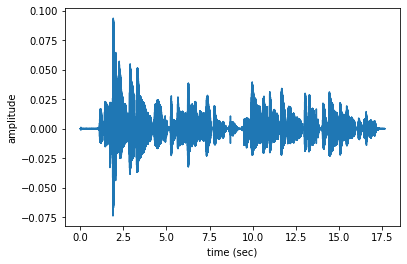

In [ ]:
n = "/content/S63_hum_1_[Potter].wav"
fs = None # Sampling frequency. If None, fs would be 22050
x, fs = librosa.load(n,sr=fs)
t = np.arange(len(x))/fs
plt.plot(t,x)
plt.xlabel('time (sec)')
plt.ylabel('amplitude')
plt.show()
display(ipd.Audio(n))

StarWars:

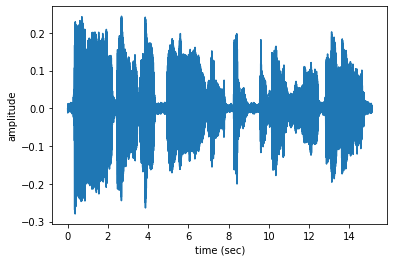

In [ ]:
n1 = "/content/S82_hum_4_[StarWars].wav"
fs = None # Sampling frequency. If None, fs would be 22050
x, fs = librosa.load(n1,sr=fs)
t = np.arange(len(x))/fs
plt.plot(t,x)
plt.xlabel('time (sec)')
plt.ylabel('amplitude')
plt.show()
display(ipd.Audio(n1))

# 8 Results

Test using the Random Forest Classifier for the "Potter" audio file

In [ ]:
X = getXy1(n, scale_audio=True, onlySingleDigit=True)

pred = clf.predict(X)
print("Song:",pred)

Song: ['Potter']


Test using the SVM model for the "StarWars" audio file

In [ ]:
X1 = getXy1(n1, scale_audio=True, onlySingleDigit=True)

pred1 = model.predict(X1)
print("Song:",pred1)

Song: ['StarWars']


# 9 Conclusions

After running the code without cleaning up the data, my model accuracy was really bad. Therefore, after cleaning up the data and extracting the features correctly the model accuracy increased drastically. I expected the SVM model to be more accurate than the Random Forest Classifier since the result can only be 2 possible values, but it seems to be the other way around.